In [1]:
using Flux, Statistics, ProgressMeter
using Plots 
using StatsBase, Random

In [2]:
using ImageShow, Images, ImageInTerminal
using MLDatasets

In [3]:
train_x_raw, train_y_raw = MNIST(split = :train)[:]
test_x_raw,  test_y_raw  = MNIST(split = :test)[:];
println( "train_x_raw size = $(size(train_x_raw)), train_y_raw size = $(size(train_y_raw))")
display( train_y_raw[1:5] )

train_x_raw size = (28, 28, 60000), train_y_raw size = (60000,)


5-element Vector{Int64}:
 5
 0
 4
 1
 9

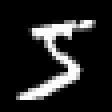

In [5]:
convert2image(MNIST, train_x_raw[ : , : , 1 ] )

In [6]:
size( train_x_raw[ : , : , 1 ] )

(28, 28)

In [36]:
image1_5 = train_x_raw[ : , : , 1 ]
image1_5_v = vec(image1_5);

In [19]:
image1_5_v' * image1_5_v

91.34956f0

In [20]:
size( image1_5_v' )

(1, 784)

In [22]:
image_r1 = rand( length(image1_5_v) );

In [23]:
image1_5_v' * image_r1

55.28052560457267

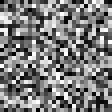

In [25]:
convert2image(MNIST, reshape(image_r1,28,28) )

In [27]:
basisW = vcat( image1_5_v' , image_r1' )

2×784 Matrix{Float64}:
 0.0         0.0       0.0       0.0       …  0.0       0.0       0.0
 0.00474033  0.312237  0.573434  0.405883     0.651094  0.317896  0.330964

In [28]:
basisW * image1_5_v

2-element Vector{Float64}:
 91.34955909811404
 55.28052560457268

In [31]:
image1_0_v = vec( train_x_raw[ : , : , 2 ] );

In [34]:
basisW = vcat( basisW , image1_0_v' )

3×784 Matrix{Float64}:
 0.0         0.0       0.0       0.0       …  0.0       0.0       0.0
 0.00474033  0.312237  0.573434  0.405883     0.651094  0.317896  0.330964
 0.0         0.0       0.0       0.0          0.0       0.0       0.0

In [35]:
basisW * image1_5_v

3-element Vector{Float64}:
 91.34955909811404
 55.28052560457268
 53.76427608910301

In [38]:
projection = basisW * rand( length(image1_5_v) )

3-element Vector{Float64}:
  55.44132139010709
 187.36711642042468
  57.84222230982801

In [39]:
Flux.onecold( projection , ["5","random","0"] )

"random"

In [40]:
projection = basisW * image1_5_v
Flux.onecold( projection , ["5","random","0"] )

"5"

In [41]:
image5_over0 = vec( train_x_raw[ : , : , 2 ] ) .+ vec( train_x_raw[ : , : , 1 ] );

In [42]:
basisW = vcat( basisW , image5_over0' )

4×784 Matrix{Float64}:
 0.0         0.0       0.0       0.0       …  0.0       0.0       0.0
 0.00474033  0.312237  0.573434  0.405883     0.651094  0.317896  0.330964
 0.0         0.0       0.0       0.0          0.0       0.0       0.0
 0.0         0.0       0.0       0.0          0.0       0.0       0.0

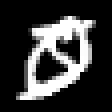

In [43]:
convert2image(MNIST, reshape(image5_over0,28,28) )

In [45]:
projection = basisW * image1_5_v
display(projection)
Flux.onecold( projection , ["5","random","0","5over0"] )

4-element Vector{Float64}:
  91.34955909811407
  55.28052560457269
  53.76427608910301
 145.11383618556385

"5over0"

In [46]:
size(basisW)

(4, 784)

In [48]:
display( train_y_raw[12] )

5

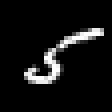

In [49]:
convert2image(MNIST, train_x_raw[ : , : , 12 ] )

In [50]:
image2_5_v = vec( train_x_raw[ : , : , 12 ] );
basisW = vcat( basisW , image2_5_v' )
println(size(basisW))

(5, 784)


In [51]:
projection = basisW * image2_5_v
display(projection)
Flux.onecold( projection , ["5","random","0","5over0","new5"] )

5-element Vector{Float64}:
  5.264959839544677
 25.711225438291613
 14.422668521343843
 19.68762841578907
 45.62900501824422

"new5"

In [54]:
display( findall( train_y_raw[1:100] .== 5 ) )

5-element Vector{Int64}:
  1
 12
 36
 48
 66

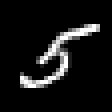

In [55]:
convert2image(MNIST, train_x_raw[ : , : , 36 ] )

In [57]:
projection = basisW * vec(train_x_raw[ : , : , 36 ])
display(projection)
softmax_tmp = Flux.softmax(projection)
display(softmax_tmp)
Flux.onecold( projection , ["5","random","0","5over0","new5"] )

5-element Vector{Float64}:
 19.03667876599873
 31.625955454148766
 19.69042719458773
 38.727106082710236
 22.66140770310951

5-element Vector{Float64}:
 2.806714522153141e-9
 0.000823477312590535
 5.3965670432669736e-9
 0.9991764091914874
 1.0529264063590153e-7

"5over0"

In [61]:
basisW = basisW[[1,2,3,5], :]
display(size(basisW))

(4, 784)

In [64]:
projection = basisW * vec(train_x_raw[ : , : , 1 ])
display(projection)
softmax_tmp = Flux.softmax(projection)
display(softmax_tmp)
Flux.onecold( projection , ["5","random","0","new5"] )

4-element Vector{Float64}:
 91.34955909811407
 55.28052560457269
 53.76427608910301
  5.264959839544677

4-element Vector{Float64}:
 0.9999999999999998
 2.1648000344830152e-16
 4.7524656704747657e-17
 4.1108683156325355e-38

"5"

In [65]:
basisW = basisW[[1,3,4], :]
display(size(basisW))

(3, 784)

In [76]:
projection = basisW * vec(train_x_raw[ : , : , 48 ])
display(projection)
softmax_tmp = Flux.softmax(projection)
display(softmax_tmp)
Flux.onecold( projection , ["5","0","new5"] )

3-element Vector{Float64}:
 36.77098115272675
 43.40948940575103
 22.48993528311184

3-element Vector{Float64}:
 0.0013072672670089293
 0.99869273191229
 8.207010138487918e-10

"0"

In [78]:
basisW2 = basisW
basisW2[1,1] = 100
basisW2[1,2] = 30
basisW2

3×784 Matrix{Float64}:
 100.0  30.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
   0.0   0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
   0.0   0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [88]:
projection = basisW2 * vec(train_x_raw[ : , : , 36 ])
display(projection)
softmax_tmp = Flux.softmax(projection)
display(softmax_tmp)
Flux.onecold( projection , ["5","0","new5"] )

3-element Vector{Float64}:
 19.03667876599873
 19.69042719458773
 22.66140770310951

3-element Vector{Float64}:
 0.02472965079022423
 0.047548554508367445
 0.9277217947014084

"new5"

In [89]:
image3_5_v = vec( train_x_raw[ : , : , 36 ] );
basisW = vcat( basisW , image3_5_v' )
image4_5_v = vec( train_x_raw[ : , : , 48 ] );
basisW = vcat( basisW , image4_5_v' )
println(size(basisW))

(5, 784)


In [96]:
projection = basisW * vec(train_x_raw[ : , : , 48 ])
display(projection)
softmax_tmp = Flux.softmax(projection)
display(softmax_tmp)
Flux.onecold( projection , ["5","0","new5_1","new5_2","new5_3"] )

5-element Vector{Float64}:
 36.77098115272675
 43.40948940575103
 22.48993528311184
 34.87787841596818
 78.03148121389043

5-element Vector{Float64}:
 1.2044603360541506e-18
 9.201529127598804e-16
 7.561589308374735e-25
 1.8139630261076347e-19
 0.9999999999999991

"new5_3"

In [102]:
W_5s = [1 0 1 1 1 ; 0 1 0 0 0]

2×5 Matrix{Int64}:
 1  0  1  1  1
 0  1  0  0  0

In [103]:
W_5s * projection

2-element Vector{Float64}:
 131.28686121078562
 103.8114738462631

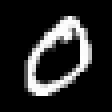

In [104]:
convert2image(MNIST, train_x_raw[ : , : , 2 ] )

In [107]:
projection = basisW * vec(train_x_raw[ : , : , 2 ])
display(projection)
softmax_tmp = Flux.softmax(projection)
display(softmax_tmp)
Flux.onecold( projection , ["5","0","new5_1","new5_2","new5_3"] )

5-element Vector{Float64}:
  53.76427608910301
 103.8114738462631
  14.422668521343843
  19.69042719458773
  43.40948940575103

5-element Vector{Float64}:
 1.8398320471076863e-22
 1.0
 1.509854520051283e-39
 2.928826377712905e-37
 5.8580282468849826e-27

"0"

In [109]:
W_5s * Flux.softmax(projection)

2-element Vector{Float64}:
 1.8398906273901578e-22
 1.0

In [110]:
projection = basisW * vec(train_x_raw[ : , : , 1 ])
display(projection)
softmax_tmp = Flux.softmax(projection)
display(softmax_tmp)
Flux.onecold( projection , ["5","0","new5_1","new5_2","new5_3"] )

5-element Vector{Float64}:
 91.34955909811407
 53.76427608910301
  5.264959839544677
 19.03667876599873
 36.77098115272675

5-element Vector{Float64}:
 1.0
 4.752465670474767e-17
 4.1108683156325365e-38
 3.934731491941761e-32
 1.9807276683710796e-24

"5"

In [111]:
W_5s * Flux.softmax(projection)

2-element Vector{Float64}:
 1.0
 4.752465670474767e-17

In [112]:
display( findall( train_y_raw[1:100] .== 0 ) )

13-element Vector{Int64}:
  2
 22
 35
 38
 52
 57
 64
 69
 70
 76
 82
 89
 96

In [114]:
projection = basisW * vec(train_x_raw[ : , : , 70 ])
display(projection)
softmax_tmp = Flux.softmax(projection)
display(softmax_tmp)
Flux.onecold( projection , ["5","0","new5_1","new5_2","new5_3"] )

5-element Vector{Float64}:
 62.20995079125959
 81.5346569540104
 22.31092707077107
 28.051503753236503
 42.907067227278404

5-element Vector{Float64}:
 4.04936334560837e-9
 0.9999999959506367
 1.9030969455567357e-26
 5.923272166557078e-24
 1.6759109197118266e-17

"0"

In [115]:
W_5s * Flux.softmax(projection)

2-element Vector{Float64}:
 4.0493633623674855e-9
 0.9999999959506367